## Setup

You will need `Keras` to run this notebook. Keras needs a backend engine to run. `TensorFlow` is recommended.  
Install TensorFlow using: `pip install tensorflow`  
Install Keras using: `pip install keras`

## Import libraries

In [1]:
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.models import Model
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
print( "Keras version: " + str(keras.__version__) )

Using TensorFlow backend.


Keras version: 2.2.4


## Load Mnist data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print( "Number of train data: "+str(X_train.shape[0]) )
print( "Number of test data:  "+str(X_test.shape[0]) )
print( "\n\nShape of X_train: \t" + str(X_train.shape) )
print( "\nShape of y_train: \t" + str(y_train.shape) )
print( "\nShape of X_test: \t" + str(X_test.shape) )
print( "\nShape of X_test: \t" + str(y_test.shape) )

Number of train data: 60000
Number of test data:  10000


Shape of X_train: 	(60000, 28, 28)

Shape of y_train: 	(60000,)

Shape of X_test: 	(10000, 28, 28)

Shape of X_test: 	(10000,)


## Visualize data

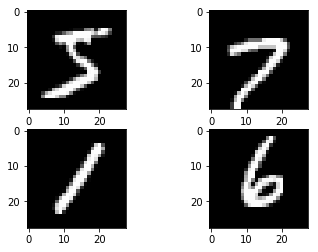

In [4]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[31245], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[51069], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Change images from 2D to 1D

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print( "Shape of train data: \t " + str( X_train.shape ) )
print( "Shape of test data: \t " + str( X_test.shape ) )

Shape of train data: 	 (60000, 784)
Shape of test data: 	 (10000, 784)


## Normalize data

In [6]:
# normalize inputs from 0-255 to 0-1
# You could even find mean and variance of data, and accordingly normalize
X_train = X_train / 255.
X_test = X_test / 255.

## Convert y labels to one hot vector

In [7]:
# one hot encode outputs
print( "Original shape of labels data:\t" + str(y_train.shape) )
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print( "Transformed shape of labels data:\t" + str(y_train.shape) )
print( "Number of classes: \t" + str(num_classes) )
print( "Label in one-hot: \t" , y_train[0] )

Original shape of labels data:	(60000,)
Transformed shape of labels data:	(60000, 10)
Number of classes: 	10
Label in one-hot: 	 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Model 1:  Define model with no hidden layer : Train time ~ 2-5s

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 0s 8us/step - loss: 1.5143 - acc: 0.6314 - val_loss: 1.0172 - val_acc: 0.8069
Epoch 2/20
40199/40199 [==============================] - 0s 4us/step - loss: 0.8313 - acc: 0.8279 - val_loss: 0.6596 - val_acc: 0.8520
Epoch 3/20
40199/40199 [==============================] - 0s 4us/step - loss: 0.5897 - acc: 0.8627 - val_loss: 0.5076 - val_acc: 0.8756
Epoch 4/20
40199/40199 [==============================] - 0s 4us/step - loss: 

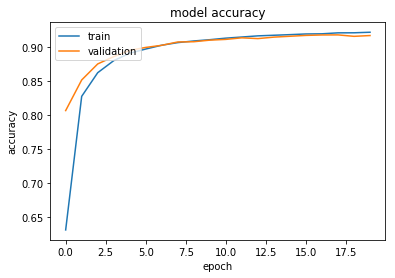

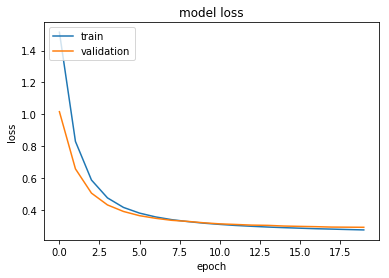

Loss: 0.2803
Accuracy: 92.24%


In [18]:
def getModel1():
    inputs = Input(shape=(784,))
    predictions = Dense(10, activation='softmax')(inputs)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model1 = getModel1()
model1.summary()

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=1)
# Final evaluation of the model
scores_1 = model1.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Loss: %.4f" % (scores_1[0]))
print("Accuracy: %.2f%%" % (scores_1[1]*100))

## Model 2:  Define model with 1 hidden layer: Train time < 1min

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
 - 1s - loss: 0.7981 - acc: 0.7957 - val_loss: 0.4252 - val_acc: 0.8859
Epoch 2/20
 - 0s - loss: 0.3601 - acc: 0.9020 - val_loss: 0.3151 - val_acc: 0.9144
Epoch 3/20
 - 0s - loss: 0.2821 - acc: 0.9223 - val_loss: 0.2729 - val_acc: 0.9232
Epoch 4/20
 - 0s - loss: 0.2387 - acc: 0.9326 - val_loss: 0.2372 - val_acc: 0.9354
Epoch 5/20
 - 0s -

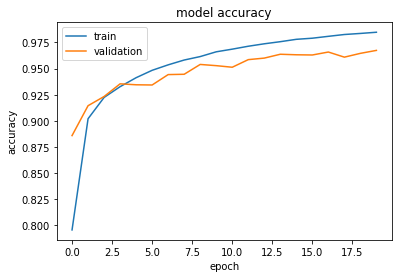

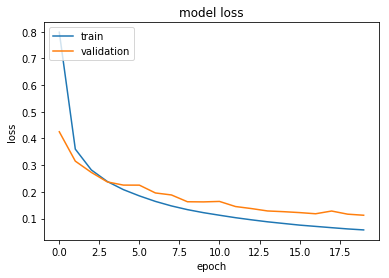

Loss: 0.2803
Accuracy: 97.27%


In [20]:
def getModel2():
    inputs = Input(shape=(784,))
    x = Dense(128, activation='relu')(inputs)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model2 = getModel2()
model2.summary()

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_2 = model2.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Loss: %.4f" % (scores_1[0]))
print("Accuracy: %.2f%%" % (scores_2[1]*100))

## Model 3: Model with 1 hidden layer and Dropout: Train time < 1 min

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
 - 1s - loss: 0.9360 - acc: 0.7332 - val_loss: 0.4532 - val_acc: 0.8774
Epoch 2/20
 - 0s - l

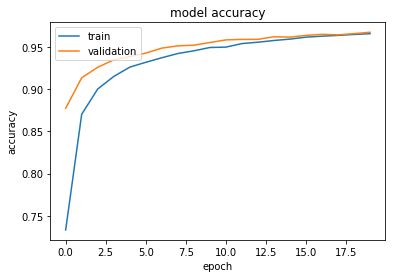

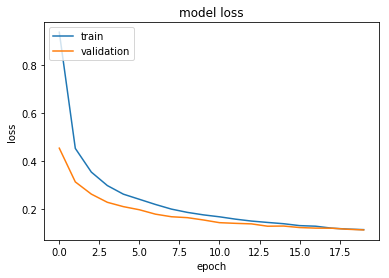

Loss: 0.2803
Accuracy: 97.13%


In [21]:
def getModel3():
    inputs = Input(shape=(784,))
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.4)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model3 = getModel3()
model3.summary()

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_3 = model3.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Loss: %.4f" % (scores_1[0]))
print("Accuracy: %.2f%%" % (scores_3[1]*100))

## Model 4:  Define model with 2 hidden layer: Train time < 1min

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
 - 1s - loss: 0.7586 - acc: 0.7967 - val_loss: 0.3580 - val_acc: 0.9040
Epoch 2/20
 - 0s - loss: 0.3253 - acc: 0.9066 - val_loss: 0.2741 - val_acc: 0.9228
Epoch 3/20
 - 0s - loss: 0.2494 - acc: 0.9283 - val_

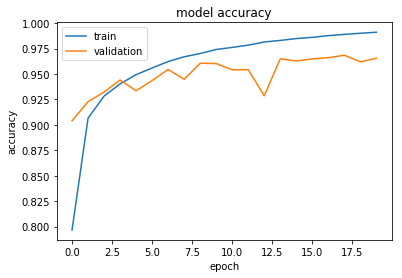

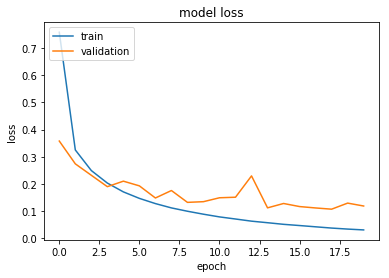

Loss: 0.2803
Accuracy: 96.89%


In [23]:
def getModel4():
    inputs = Input(shape=(784,))
    x = Dense(128, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model4 = getModel4()
model4.summary()

model4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model4.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_4 = model4.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Loss: %.4f" % (scores_1[0]))
print("Accuracy: %.2f%%" % (scores_4[1]*100))

## Model 5:  Define model with 2 hidden layer and Dropout:  Train time < 1min

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Trai

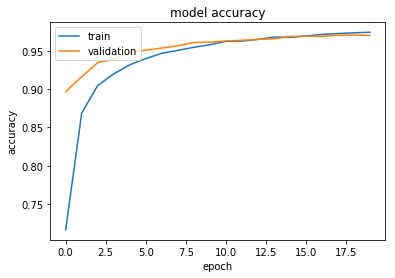

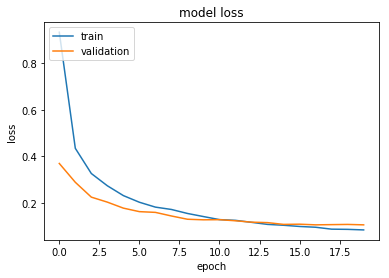

Error: 2.78%
Accuracy: 97.22%


In [24]:
def getModel5():
    inputs = Input(shape=(784,))
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model5 = getModel5()
model5.summary()

model5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model5.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_5 = model5.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Error: %.2f%%" % (100-scores_5[1]*100))
print("Accuracy: %.2f%%" % (scores_5[1]*100))

## Model 6:  Define model with 2 hidden layer and Dropout and BatchNorm:  Train time < 1min

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
__________

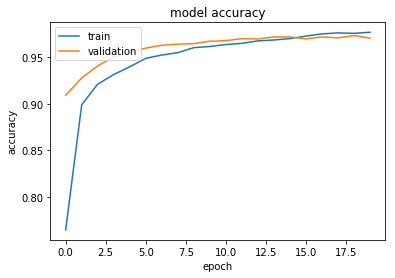

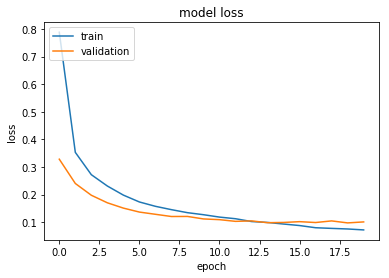

Error: 2.44%
Accuracy: 97.56%


In [25]:

def getModel6():
    inputs = Input(shape=(784,))
    
    x = Dense(128, activation=None)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    
    x = Dense(128, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model6 = getModel6()
model6.summary()

model6.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model6.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_6 = model6.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Error: %.2f%%" % (100-scores_6[1]*100))
print("Accuracy: %.2f%%" % (scores_6[1]*100))